## 第三章:数据的准备和探索


In [1]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats ## 用于相关假设检验
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)
## 引入3D坐标系
from mpl_toolkits.mplot3d import Axes3D
## cm模块提供大量的colormap函数
from matplotlib import cm
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,normalize,StandardScaler

## 忽略提醒
import warnings
warnings.filterwarnings("ignore")


### 处理缺失值

In [2]:
## 生成带有缺失值的数据
df = pd.DataFrame(np.random.randn(6,4),columns=list("ABCD"))
df.iloc[2:4,2:4]  = np.nan
df.iloc[1,0:2]  = np.nan
df

,A,B,C,D
0,1.149715,-0.422847,0.051452,-1.150005
1,NaN,NaN,-0.292627,-0.209613
2,0.991556,-1.162070,NaN,NaN
3,0.640201,0.639792,NaN,NaN
4,1.005546,-0.334640,3.278197,1.020587
5,2.523790,2.496441,1.146077,0.561178


In [3]:
## 查看数据是否有缺失值
df.isnull()

,A,B,C,D
0,False,False,False,False
1,True,True,False,False
2,False,False,True,True
3,False,False,True,True
4,False,False,False,False
5,False,False,False,False


In [4]:
## 对第A列使用0.5来填补
df.fillna({"A":0.5},inplace = True)
df["A"]

0    1.149715
1    0.500000
2    0.991556
3    0.640201
4    1.005546
5    2.523790
Name: A, dtype: float64

In [5]:
## 对变量B使用向后插补
df["B"].fillna(method = "bfill")

0   -0.422847
1   -1.162070
2   -1.162070
3    0.639792
4   -0.334640
5    2.496441
Name: B, dtype: float64

In [6]:
## 对变量C使用向前插补
df["C"].fillna(method = "ffill")

0    0.051452
1   -0.292627
2   -0.292627
3   -0.292627
4    3.278197
5    1.146077
Name: C, dtype: float64

In [7]:
## 对变量D使用均值插补
df["D"][df["D"].isnull()] = df["D"].mean()
df["D"]

0   -1.150005
1   -0.209613
2    0.055537
3    0.055537
4    1.020587
5    0.561178
Name: D, dtype: float64

#### 数据标准化处理和LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [21]:
Iris = pd.read_csv("/Users/daitu/慕课/Python机器学习入门/data/Iris.csv")
print(Iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


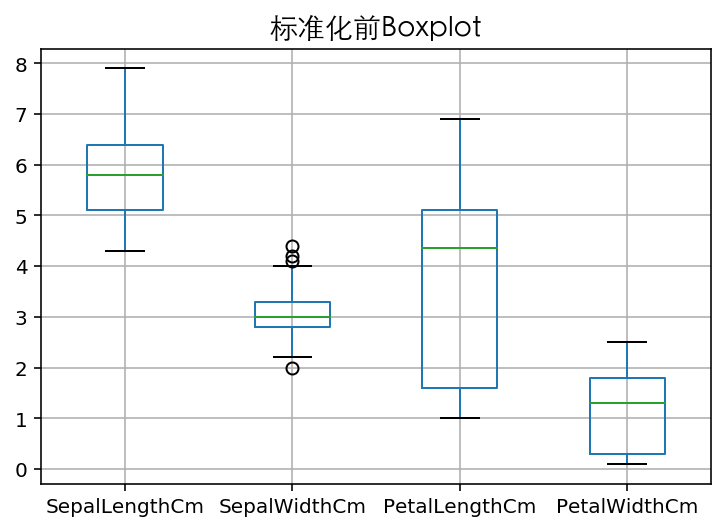

In [24]:
Iris.drop("Id", axis=1).boxplot()
plt.title("标准化前Boxplot",FontProperties = fonts)
plt.show()

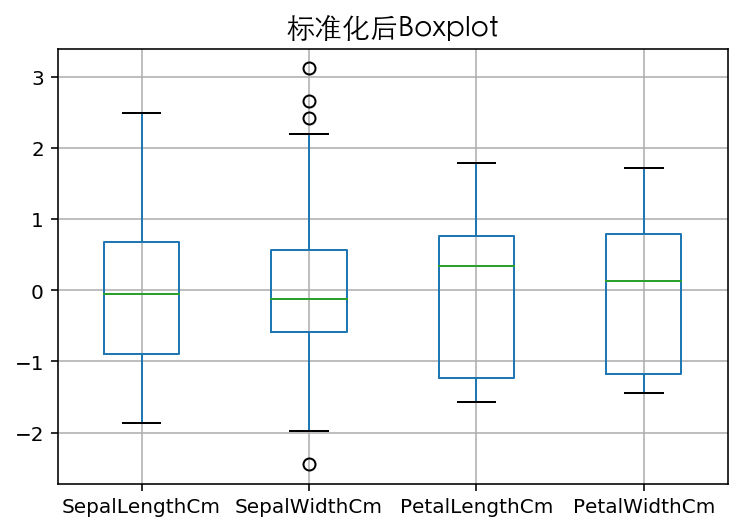

In [25]:
## 对四个特征进行标准化
scaler = StandardScaler(with_mean=True,with_std=True)
Iris.iloc[:,1:5] = scaler.fit_transform(Iris.iloc[:,1:5])
Iris.drop("Id", axis=1).boxplot()
plt.title("标准化后Boxplot",FontProperties = fonts)
plt.show()

In [31]:
## LabelEncoder将类别数据从0到n－1开始编码
le = LabelEncoder()
Species = le.fit_transform(Iris.Species)
Species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
## 生成数据的非线性特征
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = np.arange(8).reshape(4,2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [41]:
## degree指特征的最多有几个变量的乘积，interaction_only是否只有交叉项，include_bias表示是否有常数项
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
pf.fit_transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.]])

(X1,X2)-->(X1,X2,X1^2,X1\*X2,X2^2)

### 数据假设检验

**数据是否是正态分布**

**数据均值比较**

**但因素方差分析**

P值

书上的定义：

定义：在一个假设检验问题中，拒绝原假设H0的最小显著性水平称为检验的P值。

从定义可知p值表示对原假设的怀疑程度，p值越小，表明原假设越可疑，从而越应拒绝原假设。

引入p值的好处：由检验的p值与人们心中的显著性水平αα进行比较可以很容易的得出检验的结论：

如果p<＝αp<＝α，则在显著性水平下拒绝H0；

如果p>αp>α，则在显著性水平下接受H0

我使用时的理解：

P值为我们拒绝原假设时犯错误的可能性。（如果p值与选定显著性水平（0.05或0.01）相比更小，则我们拒绝原假设时犯错误的可能性很小，所以我们可以拒绝我们的原假设，接受备择假设。否则我们不能拒绝原假设。）

#### 正态性检验
生成正态概率图并进行假设检验，以检查观测值是否服从正态分布。

**对于正态性检验:**

原假设为H0：数据服从正态分布；

备择假设H1：数据不服从正态分布。

**K-S检验**
Kolmogorov-Smirnov检验

它是检验单一样本是否来自某一特定分布的方法。比如检验一组数据是否为正态分布。

(它的检验方法是以样本数据的累计频数分布与特定理论分布比较，若两者间的差距很小，则推论该样本取自某特定分布族。)

即对于假设检验问题：

H0:样本所来自的总体分布服从某特定分布（正态分布）

H1:样本所来自的总体分布不服从某特定分布（正态分布）

使用方式

stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')

In [8]:
from scipy import stats

(100,)


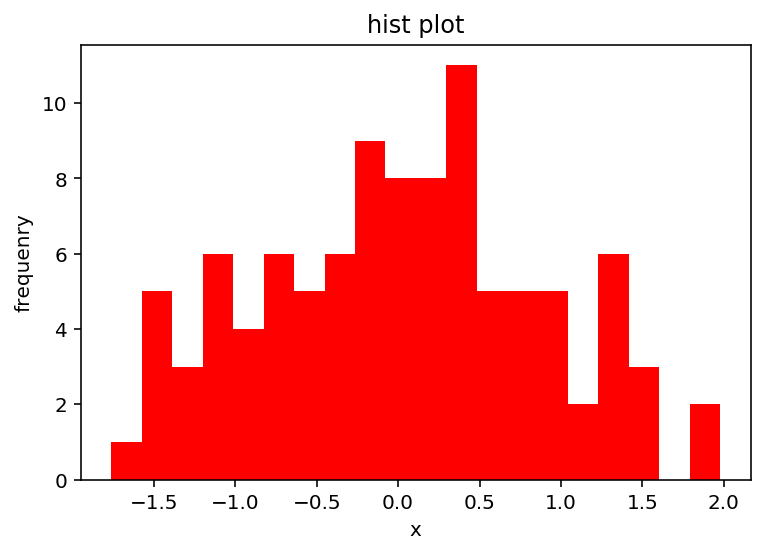

KstestResult(statistic=0.050770070239366819, pvalue=0.95880488614957782)

In [9]:
## 检验数据是否是正态分布
np.random.seed(19)
x = stats.norm.rvs(size=100)  ## Random variates of given type.
print(x.shape)
## 查看数据的直方图
plt.figure()
plt.hist(x,bins=20,color="red")
plt.xlabel("x")
plt.ylabel("frequenry")
plt.title("hist plot")
plt.show()

## 对数据进行正态性检验
stats.kstest(x, 'norm')


#### 独立两样本t检验
stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

Calculates the T-test for the means of two independent samples of scores.


对两个独立的数据进行t检验，比较两组样本的均值是否相等，本检验假定两样本具有相同的方差。

原假设：两独立样本具有相同的均值。

备择假设：两独立样本的均值不同。

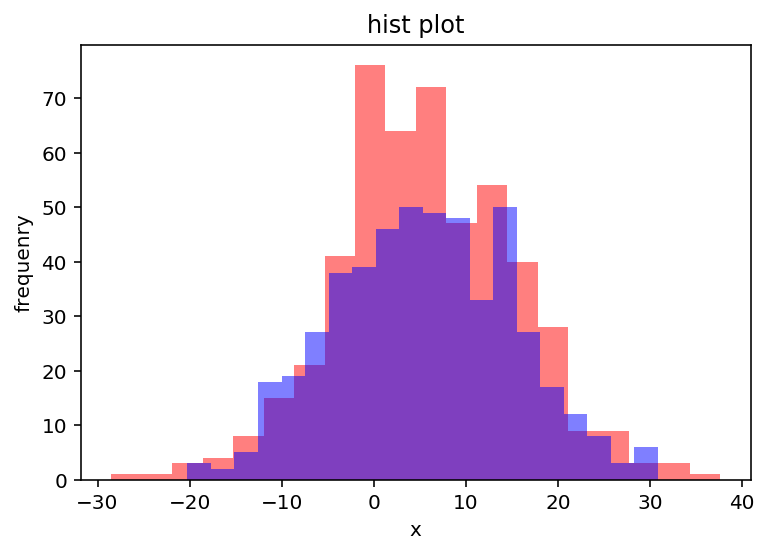

Ttest_indResult(statistic=0.30534858100573847, pvalue=0.76016435217931533)

In [10]:
## 例1:
np.random.seed(125)
x1 = stats.norm.rvs(loc=5,scale=10,size=500)
x2 = stats.norm.rvs(loc=5,scale=10,size=500)
## 查看数据的直方图
plt.figure()
plt.hist(x1,bins=20,color="red",alpha = 0.5)
plt.hist(x2,bins=20,color="blue",alpha = 0.5)
plt.xlabel("x")
plt.ylabel("frequenry")
plt.title("hist plot")
plt.show()

## 独立两样本t检验
stats.ttest_ind(x1,x2)

#### 单因素方差分析
单因素方差分析 （one-way ANOVA），用于完全随机设计的多个样本均数间的比较，其统计推断是推断各样本所代表的各总体均数是否相等。

H0:各个因素的均值相等μ0=μ1=...=μn
H1:各个因素的均值不完全相等

stats.f_oneway()

Performs a 1-way ANOVA.

单因素方差分析测试两个或多个组具有相同总体平均值的零假设。 该测试应用于来自两个或更多个组的样品，可能具有不同的样本数目。

In [11]:
import seaborn as sns
sns.set_style("white")
Iris = sns.load_dataset("iris")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


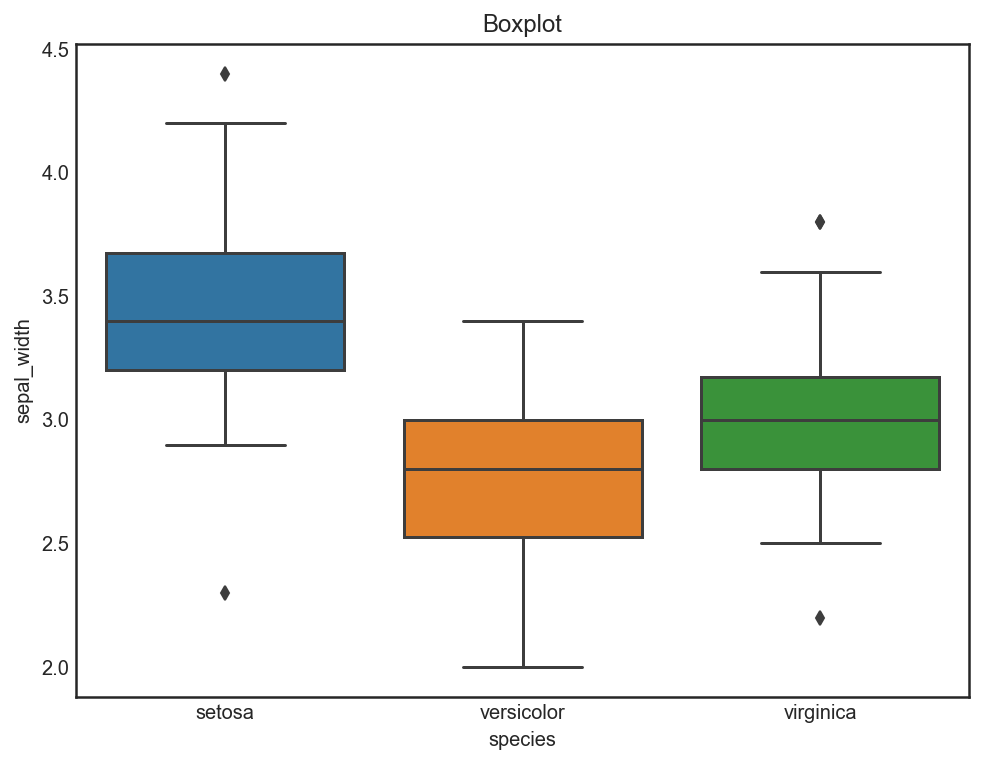

In [12]:
## 盒形图 查看数据
#  Seaborn中的boxplot，可以画箱线图，可以看出不同种类的分布情况
## 中间线为中位数，理论上是不能对比均值的，但是可以做为参考。

plt.figure(figsize=(8,6))
sns.boxplot(x="species", y="sepal_width", data=Iris)
plt.title("Boxplot")
plt.show()

In [13]:
## 单因素方差分析
setosa = Iris.sepal_width[Iris.species == "setosa"]
versicolor = Iris.sepal_width[Iris.species == "versicolor"]
virginica = Iris.sepal_width[Iris.species == "virginica"]
## 方差齐性检验
print(stats.levene(setosa,versicolor,virginica))
print("pvalue > 0.05 ,说明各组方差相等")
print("----------------------------------")
print(stats.f_oneway(setosa,versicolor,virginica))
print("pvalue < 0.05 ,说明各组均值不全相等")


LeveneResult(statistic=0.59021156558533194, pvalue=0.55551789847390753)
pvalue > 0.05 ,说明各组方差相等
----------------------------------
F_onewayResult(statistic=49.160040089612075, pvalue=4.4920171333091149e-17)
pvalue < 0.05 ,说明各组均值不全相等


  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
  setosa   versicolor  -0.658  -0.8189 -0.4971  True 
  setosa   virginica   -0.454  -0.6149 -0.2931  True 
versicolor virginica   0.204    0.0431  0.3649  True 
-----------------------------------------------------


group1,group2,meandiff,lower,upper,reject
setosa,versicolor,-0.658,-0.8189,-0.4971,True
setosa,virginica,-0.454,-0.6149,-0.2931,True
versicolor,virginica,0.204,0.0431,0.3649,True


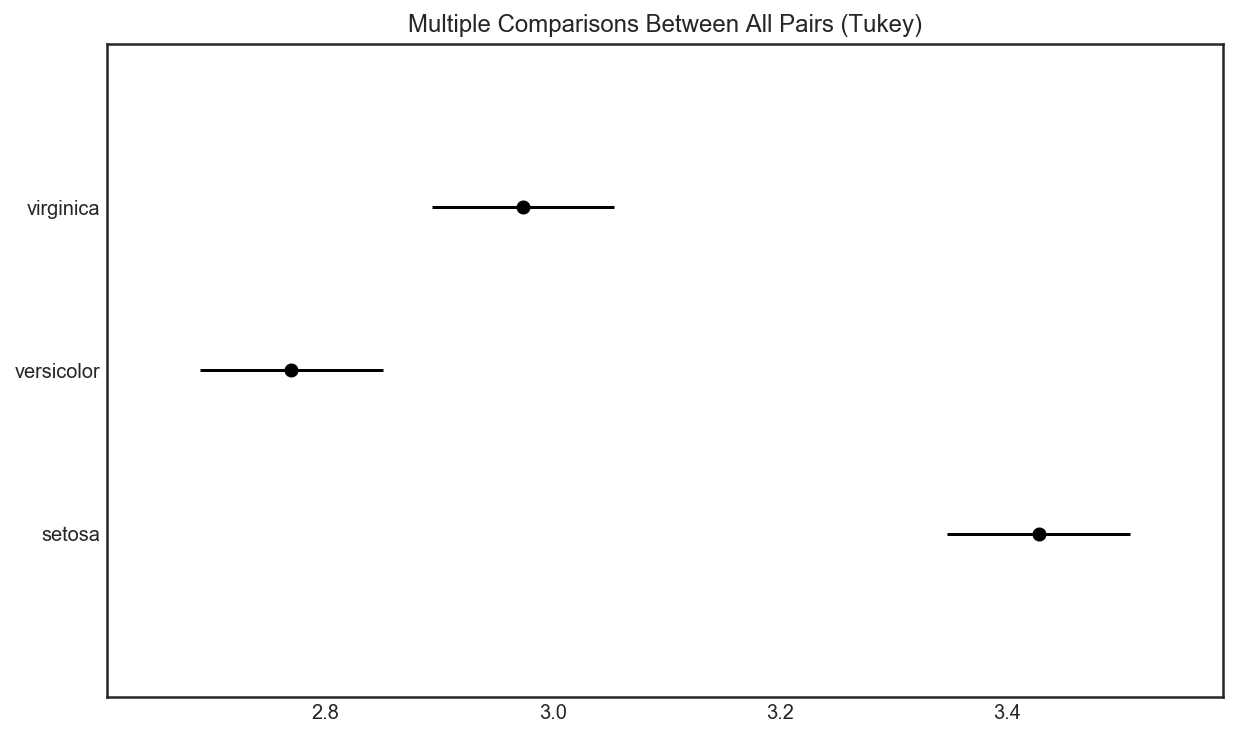

In [14]:
## 进行多重比较
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=Iris.sepal_width,     # 数据
                          groups=Iris.species,   # 分组
                          alpha=0.05)          # 显著性水平
print(tukey)
tukey.plot_simultaneous()    # 绘画出每组的置信区间

tukey.summary()              # 查看summary

#### 属性相关系数的显著性检验

In [15]:
r,pval = stats.pearsonr(Iris["sepal_length"],Iris["petal_length"])
print("相关系数: ",r)
print("---------------------")
print("相关系数显著性检验p-value: ",pval)

相关系数:  0.871753775887
---------------------
相关系数显著性检验p-value:  1.03866741945e-47


### 数据间的关系

相关分析

各种距离

比较Iris三种花平均属性之间的距离远近。

In [16]:
## 计算iris数据的皮尔逊相关性
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
Irisnew = Iris.groupby(by="species").mean()
Irisnew

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
from scipy.spatial import distance

##### 欧式距离（欧几里德距离）

$x = (x_1,x_2,...,x_n)$;$y = (y_1,y_2,...,y_n)$
$$dist = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$

In [19]:
## 计算三种花的欧式距离
dist = distance.cdist(Irisnew.values,Irisnew.values,"euclidean")
dist

array([[ 0.        ,  3.20828116,  4.75450734],
       [ 3.20828116,  0.        ,  1.62048882],
       [ 4.75450734,  1.62048882,  0.        ]])

#### 曼哈顿距离（城市块距离）

$x = (x_1,x_2,...,x_n)$;$y = (y_1,y_2,...,y_n)$
$$dist = \sum_{i=1}^n|x_i-y_i|$$

In [20]:
## 计算三种花的曼哈顿距离
dist = distance.cdist(Irisnew.values,Irisnew.values,"cityblock")
dist

array([[ 0.   ,  5.466,  7.906],
       [ 5.466,  0.   ,  2.848],
       [ 7.906,  2.848,  0.   ]])

#### 切比雪夫距离

$x = (x_1,x_2,...,x_n)$;$y = (y_1,y_2,...,y_n)$
$$dist = \max_i {|x_i-v_i|}$$



In [21]:
## 计算三种花的切比雪夫距离
dist = distance.cdist(Irisnew.values,Irisnew.values,"chebyshev")
dist

array([[ 0.   ,  2.798,  4.09 ],
       [ 2.798,  0.   ,  1.292],
       [ 4.09 ,  1.292,  0.   ]])

#### 余弦距离

$x = (x_1,x_2,...,x_n)$;$y = (y_1,y_2,...,y_n)$
$$dist = 1-\frac{x \cdot y}
            {||x||_2 ||y||_2} 
$$

#### 余弦相似性
$$ similarity= \frac{\Sigma_ix_iy_i}
            {\sqrt{\Sigma_ix_i^2}\sqrt{\Sigma_iy_i^2}} 
$$

In [22]:
## 计算三种花的余弦距离
dist = distance.cdist(Irisnew.values,Irisnew.values,"cosine")
dist
np.round(dist,4)

array([[ 0.    ,  0.0755,  0.1119],
       [ 0.0755, -0.    ,  0.0043],
       [ 0.1119,  0.0043, -0.    ]])

#### 相关系数

In [23]:
## 计算相关系数距离
dist = distance.cdist(Irisnew.values,Irisnew.values,"correlation")
dist
np.round(dist,4)

array([[-0.    ,  0.2376,  0.3834],
       [ 0.2376,  0.    ,  0.0205],
       [ 0.3834,  0.0205,  0.    ]])

#### 马氏距离

$x = (x_1,x_2,...,x_n)$;$y = (y_1,y_2,...,y_n)$
$$dist = \sqrt{(x-y)^T\Sigma^{-1}(x-y)}$$
$$dist = \sqrt{ (u-v) V^{-1} (u-v)^T } $$

In [24]:
## 计算三种花的马氏距离
dist = distance.cdist(Irisnew.values,Irisnew.values,"mahalanobis")
dist
np.round(dist,4)

array([[ 0.    ,  5.9733,  9.3979],
       [ 5.9733,  0.    ,  3.8199],
       [ 9.3979,  3.8199,  0.    ]])